In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import rc
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'

import cvxpy as cp
import numpy as np

from loss import *
from reg import *
from util import *
from glrm import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
m =1000
n1=4
n2=n1+10
# n3=n2+0
n = n2
ktrue=2
k=2


Xtrue = np.random.randn(m,ktrue)
Ytrue = np.random.randn(ktrue,n)
A = Xtrue @ Ytrue
A[:,n1:n2] = np.sign(A[:,n1:n2])
missing_mask,missing_idx = gen_random_missing_mask(A,3,return_indices=True)

In [62]:
loss_list =[
    (np.arange(n1),QuadraticLoss()),
    (np.arange(n1,n2),HingeLoss())
]
glrm = GLRM(A,loss_list,k,missing_list=missing_idx)

In [63]:
X,Y = glrm.fit()

iter 	 objY
 94 	 0.26

SolverError: Solver 'ECOS' failed. Try another solver or solve with verbose=True for more information. Try recentering the problem data around 0 and rescaling to reduce the dynamic range.

In [64]:
Ahat = X@ Y
for columns, loss_fxn in loss_list:
    for col in columns:
        Ahat[:,col] = loss_fxn.decode(Ahat[:,col])
    

In [65]:
print(np.round(Ahat,2)[:4])
print(np.round(A,2)[:4])

[[-3.99  3.66  0.81 -3.31  1.    1.    1.    1.    1.    1.   -1.   -1.
   1.    1.  ]
 [ 3.48 -2.63 -0.38  2.42 -1.   -1.   -1.   -1.   -1.   -1.    1.    1.
  -1.   -1.  ]
 [ 2.77 -0.64  0.53  0.72  1.   -1.   -1.   -1.    1.    1.   -1.    1.
  -1.    1.  ]
 [-1.95  0.56 -0.31 -0.6  -1.    1.    1.    1.   -1.    1.    1.   -1.
   1.   -1.  ]]
[[-3.32 -0.13  1.66 -1.57 -1.   -1.   -1.   -1.    1.   -1.   -1.    1.
  -1.    1.  ]
 [-2.63 -0.38  1.39 -1.05 -1.   -1.   -1.   -1.    1.   -1.   -1.   -1.
  -1.    1.  ]
 [-2.06 -0.97  1.27 -0.36 -1.   -1.   -1.   -1.    1.   -1.   -1.   -1.
  -1.    1.  ]
 [ 1.51  0.11 -0.77  0.68  1.    1.    1.    1.   -1.    1.    1.   -1.
   1.   -1.  ]]


In [66]:
Ahat[~missing_mask]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 1000

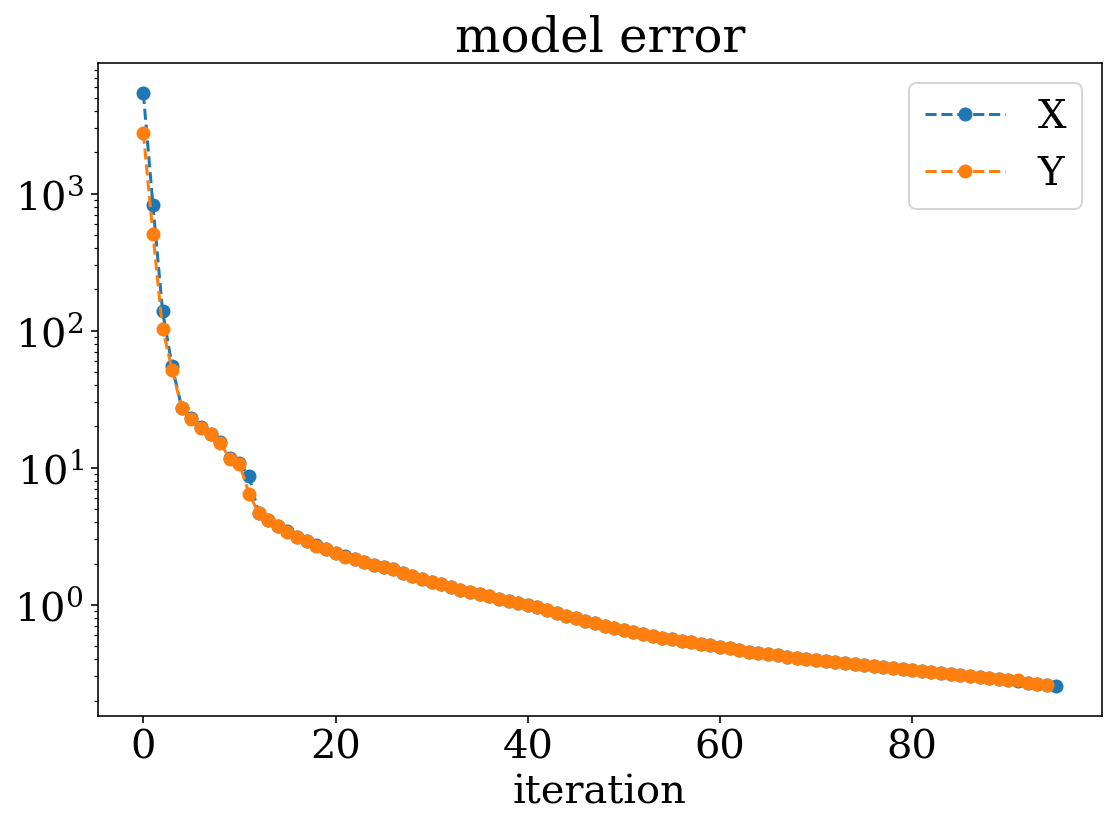

In [67]:
glrm.plot_convergence()

In [68]:
(glrm.predict()[:,0]- A[:,0])/A[:,0]

array([-1.01522853e-04, -1.28053217e-04, -1.63954617e-04,  2.22473923e-04,
       -1.67497200e-04,  2.59826640e-04,  5.76366355e-05, -1.76991347e-04,
        4.26054152e-04,  9.70822732e-05, -1.27410046e-03, -1.31735214e-04,
       -1.82597142e-04, -2.42223437e-04, -5.24357643e-03,  2.13421167e-04,
        1.59909355e-04, -1.31720187e-04, -5.07976725e-04,  7.13138116e-03,
        3.40942080e-04, -2.37010146e-04, -3.09183522e-04,  6.46364897e-03,
       -5.58366874e-04, -1.34202131e-04,  3.75734083e-04, -4.49626069e-04,
       -3.21699834e-02, -2.41577210e-04, -2.85496244e-04,  1.46190278e-04,
       -3.52511309e-01, -2.52776267e-03,  4.66534841e-04,  7.80818498e-03,
       -5.54460340e-04, -1.58755484e-04, -2.29630538e-04,  1.28135668e-04,
        1.72639566e-04,  1.51684532e-01, -2.87163165e-04, -6.30870251e-05,
        2.20978475e-04,  2.90408932e-04, -2.42141252e-03, -9.80598232e-05,
       -3.08852351e-04, -1.26945173e-04, -2.01005567e-03,  9.55166853e-04,
        7.86356870e-03,  